In [32]:
import subprocess
import sys

# Install required packages
packages = [
    'numpy',
    'opencv-python',
    'matplotlib',
    'scikit-learn',
    'seaborn',
    'kagglehub'
]

for package in packages:
    subprocess.check_call([sys.executable, '-m', 'pip', 'install', package])

# Lab Assignment Two: Exploring Image Data

Author: Jadon Swearingen, Andy Su, Emilio Munoz

Lab Assignment Two: Exploring Image Data 
You are to perform preprocessing and exploratory analysis of a data set: exploring the statistical summaries of the features, visualizing the attributes, and addressing data quality. This report is worth 10% of the final grade. Please upload a report (one per team) with all code used, visualizations, and text in a rendered Jupyter notebook. Any visualizations that cannot be embedded in the notebook, please provide screenshots of the output.

Dataset requirements: Choose a dataset that is comprised of image data. The data should be directories of images. That is, the dataset should not yet be pre-processed. The following are required for the dataset:

The data includes at least 1000 images
The size of the images should be larger than 20x20 pixels 
The dataset should have a well defined prediction task (i.e., a label for each image)
The dataset cannot be MNIST or Fashion MNIST 
A note on grading: This lab is mostly about visualizing and understanding your dataset. The largest share of the points is from how you interpret the visuals that you make. Making the visuals is not enough to satisfy each of the rubrics below—you should appropriately explain what the implications of the visualizations are. In other words, expect about 20% of the available points for visuals that have no substantive discussion. 

Business Understanding (2 points total).  

[2 points] Give an overview of the dataset. Describe the purpose of the data set you selected (i.e., why was this data collected in the first place?). What is the prediction task for your dataset and which third parties would be interested in the results? Why is this data important? Once you begin modeling, how well would your prediction algorithm need to perform to be considered useful to the identified third parties? Be specific and use your own words to describe the aspects of the data. 

Data Preparation (1 points total)

[.5 points] Read in your images as numpy arrays. Resize and recolor images as necessary. 

[.4 points] Linearize the images to create a table of 1-D image features (each row should be one image).   

[.1 points] Visualize several images.

In [33]:
# Import necessary libraries
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.random_projection import GaussianRandomProjection
import seaborn as sns

# Define your data directory containing subfolders (class labels)
data_dir = "pc_parts"

# Initialize lists to store data and labels
image_data = []
labels = []

# Traverse subfolders
for class_name in os.listdir(data_dir):
    class_dir = os.path.join(data_dir, class_name)
    if os.path.isdir(class_dir):
        for img_file in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_file)
            img = cv2.imread(img_path)
            imgg = cv2.resize(img, (128, 128))
            gray_image = cv2.cvtColor(imgg, cv2.COLOR_BGR2GRAY)
            image_data.append(np.ravel(gray_image))
            labels.append(class_name)

# Convert lists to NumPy arrays
X = np.array(image_data)
y = np.array(labels)
names=list(set(labels))
label = {item:i + 1 for i, item in enumerate(names)}

# Print shapes for verification
print("x_train shape:", X.shape)
print("y_train shape:", y.shape)

x_train shape: (3279, 16384)
y_train shape: (3279,)


In [34]:
n_samples, n_features = X.shape
n_classes = len(names)

h, w = 128, 128
print("n_samples: {}".format(n_samples))
print("n_features: {}".format(n_features))
print("n_classes: {}".format(n_classes))
print(f"Original Image Sizes {h} by {w}")

n_samples: 3279
n_features: 16384
n_classes: 14
Original Image Sizes 128 by 128


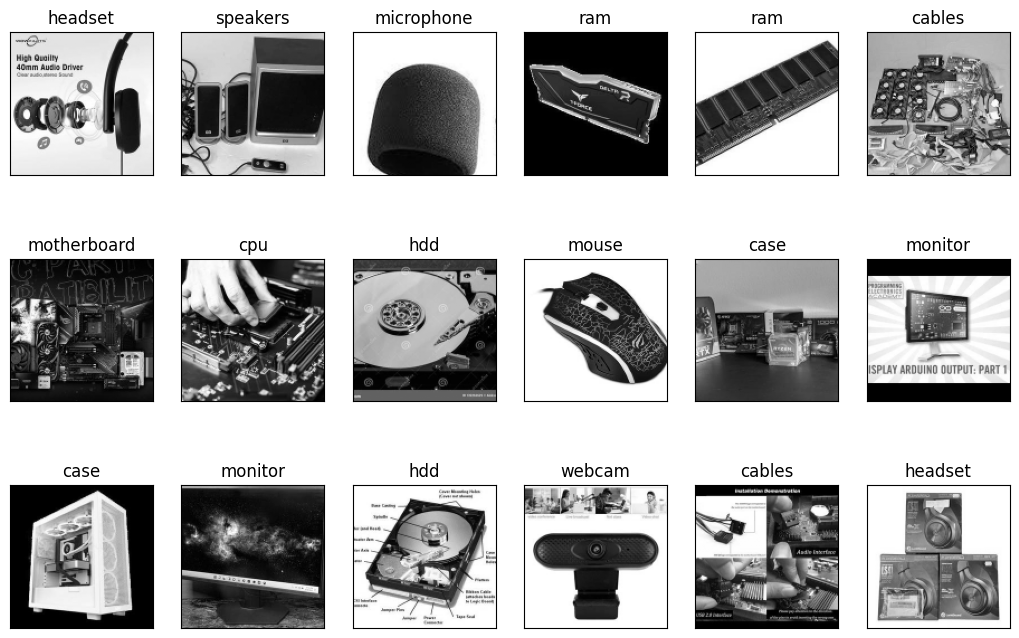

In [35]:
# a helper plotting function
import random
randomlist = random.sample(range(0, len(X)), 18)

def plot_gallery(images, titles, h, w, n_row=3, n_col=6):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.7 * n_col, 2.3 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[randomlist[i]].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[randomlist[i]], size=12)
        plt.xticks(())
        plt.yticks(())

plot_gallery(X, y, h, w) # defaults to showing a 3 by 6 subset of the faces

## 3. Data Reduction (6 points)

### 3.1 Principal Component Analysis (0.5 points)
Perform linear dimensionality reduction of the images using principal components analysis. Visualize the explained variance of each component. Analyze how many dimensions are required to adequately represent your image data. Explain your analysis and conclusion.

In [36]:
# TODO: Implement PCA analysis
# pca = PCA()
# pca.fit(X)
# Visualize explained variance

### Analysis and Conclusion for PCA:
[Insert your analysis of PCA results here]

### 3.2 Randomized Principal Component Analysis (0.5 points)
Perform linear dimensionality reduction of your image data using randomized principal components analysis. Visualize the explained variance of each component. Analyze how many dimensions are required to adequately represent your image data. Explain your analysis and conclusion.

In [37]:
# TODO: Implement Randomized PCA analysis
# from sklearn.decomposition import PCA
# rpca = PCA(random_state=42)
# rpca.fit(X)
# Visualize explained variance

### Analysis and Conclusion for Randomized PCA:
[Insert your analysis of Randomized PCA results here]

### 3.3 Comparison of PCA vs Randomized PCA (2 points)
Compare the representation using PCA and Randomized PCA. The method you choose to compare dimensionality methods should quantitatively explain which method is better at representing the images with fewer components. Do you prefer one method over another? Why?

In [38]:
# TODO: Implement comparison between PCA and Randomized PCA
# Compare reconstruction error, explained variance, or other metrics

### Comparison Analysis and Conclusion:
[Insert your detailed comparison and preference here]

### 3.4 Feature Extraction Technique (1 point)
Perform feature extraction upon the images using any feature extraction technique (e.g., gabor filters, ordered gradients, DAISY, etc.).

In [39]:
# TODO: Implement your chosen feature extraction technique
# Options: Gabor filters, Ordered gradients, DAISY, SIFT, etc.

### 3.5 Feature Extraction Analysis (2 points)
Does this feature extraction method show promise for your prediction task? Why? Use visualizations to analyze this question. For example:
- Visualize the differences between statistics of extracted features in each target class
- Use a heat map of the pairwise differences (ordered by class) among all extracted features
- Build a nearest neighbor classifier to see actual classification performance

In [40]:
# TODO: Analyze the effectiveness of your feature extraction method
# Create visualizations and metrics to evaluate performance

### Feature Extraction Analysis and Conclusion:
[Insert your analysis of the feature extraction method and its promise for your prediction task]

## 4. Exceptional Work (1 point)

You have free reign to provide any additional analyses.

### Optional: Advanced Feature Matching with DAISY
*(Required for 7000 level students)*

Perform feature extraction upon the images using DAISY. Rather than using matching on the images with the total DAISY vector, you will instead use key point matching. You will need to investigate appropriate methods for key point matching using DAISY. NOTE: this often requires some type of brute force matching per pair of images, which can be computationally expensive. Does it perform better than not using key point matching?

In [41]:
# TODO: Implement advanced analysis (optional/required based on course level)
# This could include DAISY key point matching or other advanced techniques

### Exceptional Work Analysis:
[Insert your additional analysis or findings here]